In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pandas_profiling import ProfileReport
from pyprojroot import here

In [2]:
path_data = "/scratch/sadamov/aldernet/npy/small_allweather/"
data = xr.open_zarr("/scratch/sadamov/aldernet/data.zarr")
hazel_train = np.load(path_data + "hazel_train.npy")
hazel_valid = np.load(path_data + "hazel_valid.npy")
alder_train = np.load(path_data + "alder_train.npy")
alder_valid = np.load(path_data + "alder_valid.npy")
weather_train = np.load(path_data + "weather_train.npy")
weather_valid = np.load(path_data + "weather_valid.npy")

In [3]:
# weather_params = [
#     "ALNUfr",
#     "CORYctsum",
#     "CORYfr",
#     "DURSUN",
#     "HPBL",
#     "PLCOV",
#     "T",
#     "TWATER",
#     "U",
#     "V",
# ]
weather_params = list(data.drop_vars(("CORY", "ALNU")).keys())


array([[<AxesSubplot:title={'center':'hazel_train'}>,
        <AxesSubplot:title={'center':'alder_train'}>]], dtype=object)

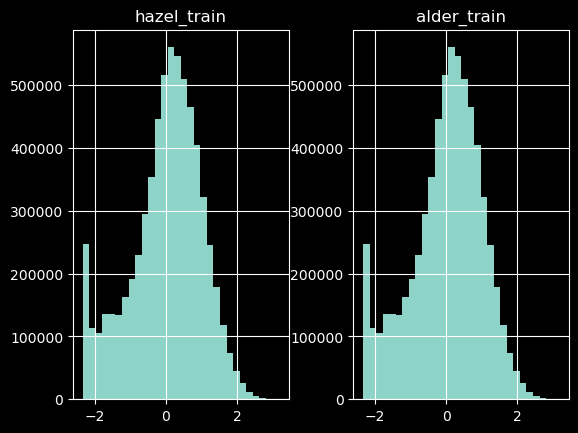

In [4]:
df_combined = pd.DataFrame({"hazel_train": hazel_train.flatten("C"),
                            "alder_train": hazel_train.flatten("C")})
df_combined.hist(bins=30)

In [5]:
# df_combined = pd.DataFrame({"hazel_valid": hazel_valid.flatten("C"),
#                             "alder_valid": hazel_valid.flatten("C")})
# df_combined.hist(bins=30)

In [6]:
for i,item in enumerate(weather_params):
  df_combined[item] = weather_train[:, :, :, i].flatten("C")

In [7]:
df_sample = df_combined.sample(10000)

In [8]:
profile = ProfileReport(
    df_sample,
    title="Pandas Profiling Report",
    dark_mode=False,
    missing_diagrams=None,
    interactions=None)
profile.config.html.minify_html = True
profile.to_file(str(here()) + "/output/" + "profiling_report.html")
profile.invalidate_cache()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/scratch-shared/meteoswiss/scratch/sadamov/mambaforge/envs/aldernet/lib/python3.10/site-packages/multimethod/__init__.py:184: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return self[tuple(map(self.get_type, args))](*args, **kwargs)
/scratch-shared/meteoswiss/scratch/sadamov/mambaforge/envs/aldernet/lib/python3.10/site-packages/multimethod/__init__.py:184: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return self[tuple(map(self.get_type, args))](*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]